### Nov 4, 2020
## Merging and Cleaning data

This notebook will be merging and cleaning the data provided by --- and ---

In [1]:
#set up
setwd("~/eco590_Data_Analysis_Python_R/Data Cleaning")
library(tidyverse)
library(dplyr)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::

In [2]:
#load patents datasets
read.csv("firm_year_inventorcount.csv") -> inventors
read.csv("firm_year_pat.csv") -> patents

head(inventors)
head(patents)

assignee_name,fyear,inv_name
A Anderson,1971,3
A Baugh,1972,2
A Bentley,1972,1
A Bixier,1973,3
A Bodine,1972,3
A Bodine,1973,1


assignee_name,fyear,patnum
A Anderson,1971,1
A Baugh,1972,1
A Bentley,1972,1
A Bixier,1973,1
A Bodine,1972,2
A Bodine,1973,1


In [3]:
#merge patents datasets
left_join(patents,inventors,by=c("assignee_name","fyear")) -> merged
head(merged)

assignee_name,fyear,patnum,inv_name
A Anderson,1971,1,3
A Baugh,1972,1,2
A Bentley,1972,1,1
A Bixier,1973,1,3
A Bodine,1972,2,3
A Bodine,1973,1,1


In [4]:
#filter years
merged %>%
    filter(fyear >= 1970 & fyear <= 1987) -> merged

merged %>% arrange(fyear) #making sure 1970 and 1987 are included

assignee_name,fyear,patnum,inv_name
A Knebel,1970,1,2
A Lamm,1970,1,2
A Nutku,1970,2,3
A Peterson,1970,1,1
Adams S,1970,1,6
Airas T,1970,1,2
Aisin Seiki,1970,1,1
Akio Ito,1970,1,1
Albert J Dinnerstein,1970,1,1
Alden L Safstrom,1970,1,1


In [5]:
#make all assignee names lowercase
merged$assignee_name <- tolower(merged$assignee_name)
head(merged)

assignee_name,fyear,patnum,inv_name
a anderson,1971,1,3
a baugh,1972,1,2
a bentley,1972,1,1
a bixier,1973,1,3
a bodine,1972,2,3
a bodine,1973,1,1


## Add Assignee Info
There might be some weirdness here since I only have assignee data for companies that made patents post 1976.

*EDIT:* I'm just an idiot. Use data sent from this guy.

In [8]:
#load assignee data
read.csv("patents_assignee_name_location_from_1970.csv") -> assignees
head(assignees)

X,patnum,assignee_name,assignee_state,assignee_country
0,5333264,"rohm co., ltd.",,jp
1,5333267,"apple computer, inc.",ca,us
2,5333266,international business machines corporation,ny,us
3,5333261,"texas instruments, incorporated",tx,us
4,5333260,digital equipment corporation,ma,us
5,5333263,minolta camera kabushiki kaisha,,jp


In [12]:
#drop X col
# assignees %>% select(!X) -> assignees
head(assignees)

patnum,assignee_name,assignee_state,assignee_country
5333264,"rohm co., ltd.",,jp
5333267,"apple computer, inc.",ca,us
5333266,international business machines corporation,ny,us
5333261,"texas instruments, incorporated",tx,us
5333260,digital equipment corporation,ma,us
5333263,minolta camera kabushiki kaisha,,jp


In [ ]:
#group
assignees %>%
    group_by(assignee_name, assignee_country, assignee_state) %>%
    summarise(totalpats=n()) %>%
    filter(assignee_name == " ")

In [60]:
# merge assignees w firms
left_join(merged,assignees, by=c("assignee_name"="assignee_organization")) -> firms
head(firms)
#run only once

assignee_name,fyear,patnum,inv_name,assignee_key_id,assignee_country,assignee_state,government,assignee_type
a anderson,1971,1,3,NA,NA,NA,NA,NA
a baugh,1972,1,2,NA,NA,NA,NA,NA
a bentley,1972,1,1,NA,NA,NA,NA,NA
a bixier,1973,1,3,NA,NA,NA,NA,NA
a bodine,1972,2,3,NA,NA,NA,NA,NA
a bodine,1973,1,1,NA,NA,NA,NA,NA


### The weirdness strikes
Some foreign companies have patents w/ the country as US - some even have states tied to them. I'll be filtering all of these companies out for this first round

In [66]:
#filter US companies
# firms %>%
#     filter(assignee_country == "US") %>%
#     filter(!str_detect(assignee_name,"toyota")) %>%
# #     filter(assignee_state == ".") %>%
# #     filter(assignee_type == 3)

#create domestic var
firms %>%
    mutate(domestic = ifelse(assignee_type=='2' | assignee_type=='6' | assignee_type=='12',1,0)) -> firms


In [79]:
#filter US companies
firms %>%
    filter(domestic == 1) %>%
    filter(assignee_state == ".")

#change type to substitute vals
as.character(firms$assignee_state) -> firms$assignee_state

# change blank states to the most often state for that firm
firms$assignee_state[firms$assignee_name == 'allied corporation'] <- 'NJ'
firms$assignee_state[firms$assignee_name == 'billings energy corporation'] <- 'UT'

#goggi corporation is the only US domestic firm that doesn't have a state, I'll keep it but it also won't have fuel prices

assignee_name,fyear,patnum,inv_name,assignee_key_id,assignee_country,assignee_state,government,assignee_type,domestic
goggi corporation,1974,1,2,385244,US,.,0,2,1


In [82]:
#filter US companies
firms %>%
    filter(domestic == 1) -> firms

# firms %>%
#     filter(assignee_state == ".") #checking that the substitution worked

firms

assignee_name,fyear,patnum,inv_name,assignee_key_id,assignee_country,assignee_state,government,assignee_type,domestic
"a. c. engines, inc.",1977,1,6,450143,US,LA,0,2,1
"acf industries, incorporated",1970,2,2,202257,US,MO,0,2,1
"acf industries, incorporated",1970,2,2,202257,US,NY,0,2,1
"acf industries, incorporated",1971,1,1,202257,US,MO,0,2,1
"acf industries, incorporated",1971,1,1,202257,US,NY,0,2,1
"acf industries, incorporated",1973,2,2,202257,US,MO,0,2,1
"acf industries, incorporated",1973,2,2,202257,US,NY,0,2,1
"acf industries, incorporated",1975,4,12,202257,US,MO,0,2,1
"acf industries, incorporated",1975,4,12,202257,US,NY,0,2,1
"acf industries, incorporated",1976,2,10,202257,US,MO,0,2,1


## Add fuel price data

In [85]:
#load data
read.csv("gas_price_by_state.csv") -> gas_prices
head(gas_prices)

State,Years,fuel_dollars_per_gallon
AK,1970,0.40
AK,1971,0.41
AK,1972,0.40
AK,1973,0.43
AK,1974,0.60
AK,1975,0.64


In [87]:
#merge w/ firms df
left_join(firms, gas_prices, by=c("assignee_state" = "State", "fyear"="Years")) -> firms
head(firms)

#only run once

assignee_name,fyear,patnum,inv_name,assignee_key_id,assignee_country,assignee_state,government,assignee_type,domestic,fuel_dollars_per_gallon
"a. c. engines, inc.",1977,1,6,450143,US,LA,0,2,1,0.63
"acf industries, incorporated",1970,2,2,202257,US,MO,0,2,1,0.34
"acf industries, incorporated",1970,2,2,202257,US,NY,0,2,1,0.37
"acf industries, incorporated",1971,1,1,202257,US,MO,0,2,1,0.36
"acf industries, incorporated",1971,1,1,202257,US,NY,0,2,1,0.38
"acf industries, incorporated",1973,2,2,202257,US,MO,0,2,1,0.39


In [90]:
#rename fyear and inv_name
gsub("fyear", "year", names(firms)) -> names(firms)
gsub("inv_name","inventor_num", names(firms)) -> names(firms)
head(firms,1)

assignee_name,year,patnum,inventor_num,assignee_key_id,assignee_country,assignee_state,government,assignee_type,domestic,fuel_dollars_per_gallon
"a. c. engines, inc.",1977,1,6,450143,US,LA,0,2,1,0.63


## Add CAFE regulations for each year

In [96]:
#load data
read.csv("cafe_regs.csv") -> regulation
regulation

MODEL.YEAR,Passenger.Cars.Combined,Light.Trucks.2WD,Light.Trucks.4WD
1978,18.0,NA,NA
1979,19.0,17.2,15.8
1980,20.0,16.0,14.0
1981,22.0,16.7,15.0
1982,24.0,18.0,16.0
1983,26.0,19.5,17.5
1984,27.0,20.3,18.5
1985,27.5,19.7,18.9
1986,26.0,20.5,19.5
1987,26.0,21.0,19.5


In [100]:
#drop Light trucks regs
regulation %>%
    select(MODEL.YEAR,Passenger.Cars.Combined) -> regulation

regulation

MODEL.YEAR,Passenger.Cars.Combined
1978,18.0
1979,19.0
1980,20.0
1981,22.0
1982,24.0
1983,26.0
1984,27.0
1985,27.5
1986,26.0
1987,26.0


In [105]:
#check types
sapply(regulation,class)
sapply(firms,class)

#make firms$year integer type
as.integer(firms$year) -> firms$year

sapply(firms,class)

MODEL.YEAR Passenger.Cars.Combined 
              "integer"               "numeric"

assignee_name                    year                  patnum 
            "character"               "numeric"               "integer" 
           inventor_num         assignee_key_id        assignee_country 
              "integer"               "integer"                "factor" 
         assignee_state              government           assignee_type 
            "character"               "integer"               "integer" 
               domestic fuel_dollars_per_gallon 
              "numeric"               "numeric"

assignee_name                    year                  patnum 
            "character"               "integer"               "integer" 
           inventor_num         assignee_key_id        assignee_country 
              "integer"               "integer"                "factor" 
         assignee_state              government           assignee_type 
            "character"               "integer"               "integer" 
               domestic fuel_dollars_per_gallon 
              "numeric"               "numeric"

In [109]:
#merge w/ firms
left_join(firms, regulation, by=c("year"="MODEL.YEAR")) -> firms
firms

#run only once

assignee_name,year,patnum,inventor_num,assignee_key_id,assignee_country,assignee_state,government,assignee_type,domestic,fuel_dollars_per_gallon,Passenger.Cars.Combined
"a. c. engines, inc.",1977,1,6,450143,US,LA,0,2,1,0.63,NA
"acf industries, incorporated",1970,2,2,202257,US,MO,0,2,1,0.34,NA
"acf industries, incorporated",1970,2,2,202257,US,NY,0,2,1,0.37,NA
"acf industries, incorporated",1971,1,1,202257,US,MO,0,2,1,0.36,NA
"acf industries, incorporated",1971,1,1,202257,US,NY,0,2,1,0.38,NA
"acf industries, incorporated",1973,2,2,202257,US,MO,0,2,1,0.39,NA
"acf industries, incorporated",1973,2,2,202257,US,NY,0,2,1,0.42,NA
"acf industries, incorporated",1975,4,12,202257,US,MO,0,2,1,0.57,NA
"acf industries, incorporated",1975,4,12,202257,US,NY,0,2,1,0.60,NA
"acf industries, incorporated",1976,2,10,202257,US,MO,0,2,1,0.59,NA


In [110]:
#rename pass... mess
gsub("Passenger.Cars.Combined","CAFE",names(firms)) -> names(firms)
head(firms,1)

assignee_name,year,patnum,inventor_num,assignee_key_id,assignee_country,assignee_state,government,assignee_type,domestic,fuel_dollars_per_gallon,CAFE
"a. c. engines, inc.",1977,1,6,450143,US,LA,0,2,1,0.63,NA


### Export dataset

In [111]:
write.csv(firms, "patents_1970to87.csv", row.names=FALSE)

## Let's look at our data

In [93]:
library(ggplot2)
library(scales)

Warning message:
"package 'scales' was built under R version 3.6.3"
Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor



`summarise()` regrouping output by 'year' (override with `.groups` argument)
Warning message:
"Removed 627 row(s) containing missing values (geom_path)."

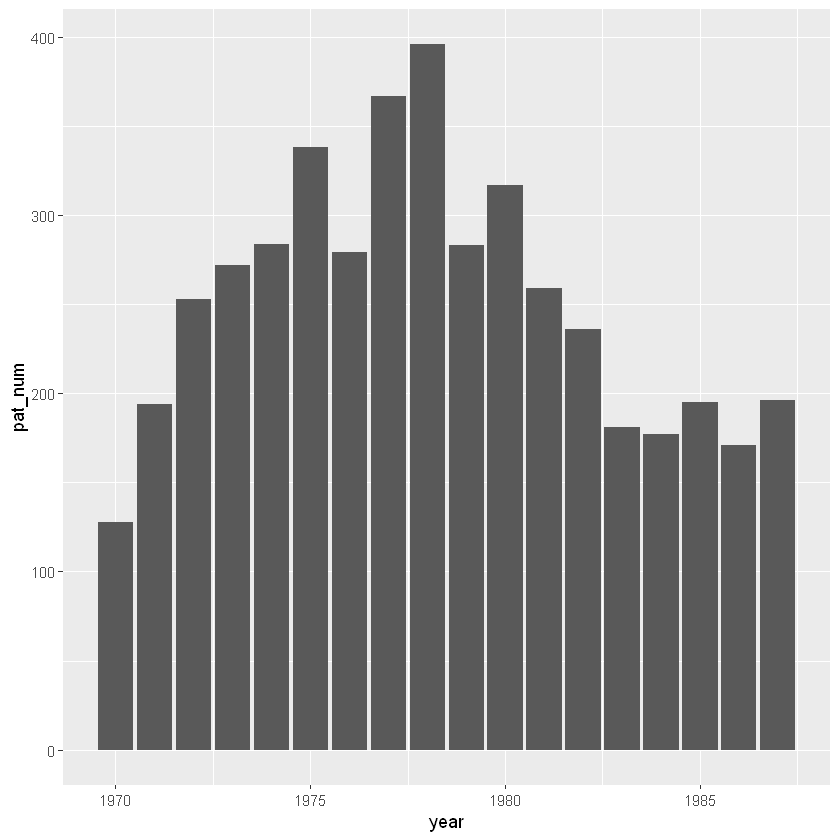

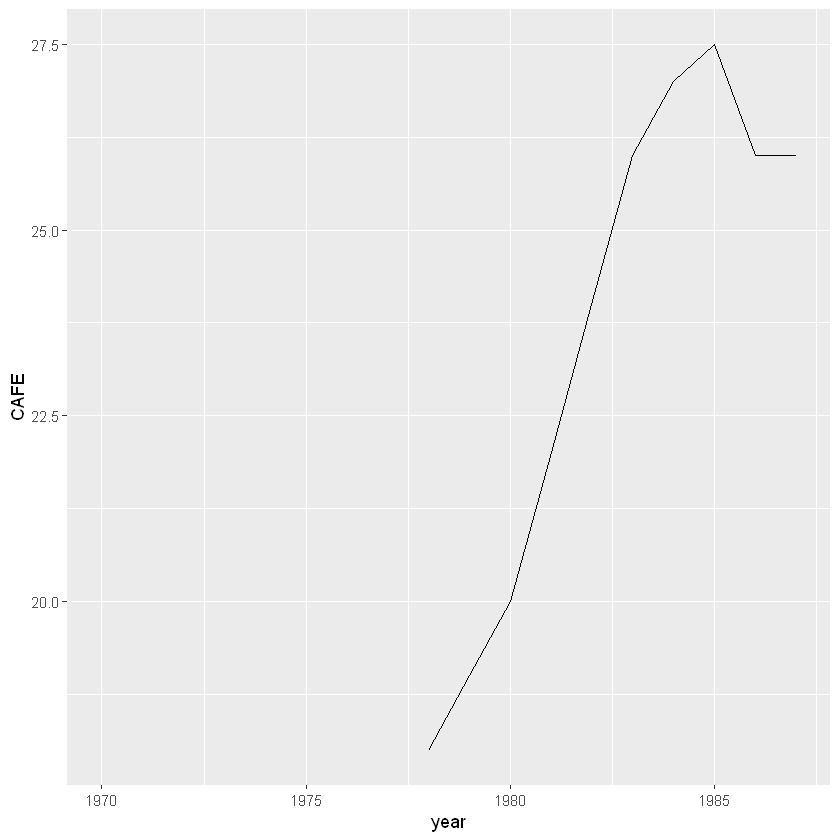

In [116]:
#plot years and num patents
firms %>%
    group_by(year,CAFE) %>%
    summarise(pat_num=sum(patnum)) %>%
ggplot(aes(x = year, y = pat_num)) +
#     geom_line(aes(x = year, y = pat_num)) +
    geom_bar(stat="identity")

ggplot(firms)  +
    geom_line(aes(year, CAFE))